# **Aprendizado Bayesiano**

**Vantagens:**
* Rápido
* Simplicidade de interpretação
* Trabalha com altas dimensões
* Boas previsões em bases pequenas

**Desvantagens:**
* Combinação de características (considera os atributos independentes)

In [49]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Base de Risco de Crédito

In [50]:
base_risco_credito = pd.read_csv('/Users/gustavomeira/Documents/Python/Estudo_ML/projects/Classificação/risco_credito.csv')

In [51]:
display(base_risco_credito)

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [52]:
X_risco_credito = base_risco_credito.iloc[:,0:4].values
Y_risco_credito = base_risco_credito.iloc[:,4].values

In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [54]:
import pickle

with open('risco_credito.pkl',mode='wb') as f:
    pickle.dump([X_risco_credito, Y_risco_credito], f)

In [55]:
naive_rico_credito = GaussianNB()
naive_rico_credito.fit(X = X_risco_credito, y = Y_risco_credito)

GaussianNB()

In [56]:
# hhistória boa [0] | dívida alta [0] | garantia nenhuma [1] | renda >35 [2]
previsao = naive_rico_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
display(previsao)

array(['baixo', 'moderado'], dtype='<U8')

In [57]:
display(naive_rico_credito.classes_)
display(naive_rico_credito.class_count_)
display(naive_rico_credito.class_prior_)

array(['alto', 'baixo', 'moderado'], dtype='<U8')

array([6., 5., 3.])

array([0.42857143, 0.35714286, 0.21428571])

### Base de Crédito

In [62]:
with open('/Users/gustavomeira/Documents/Python/Estudo_ML/projects/Classificação/credit.pkl',mode='rb') as f:
    [X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste] = pickle.load(f)

In [69]:
X_credit_treinamento = np.array(X_credit_treinamento)
y_credit_treinamento = np.array(y_credit_treinamento)
X_credit_teste = np.array(X_credit_teste)
y_credit_teste = np.array(y_credit_teste)

In [71]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [72]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

display(accuracy_score(y_true=y_credit_teste, y_pred=previsoes))

0.938

Matriz de Confusão

array([[428,   8],
       [ 23,  41]])

0.938

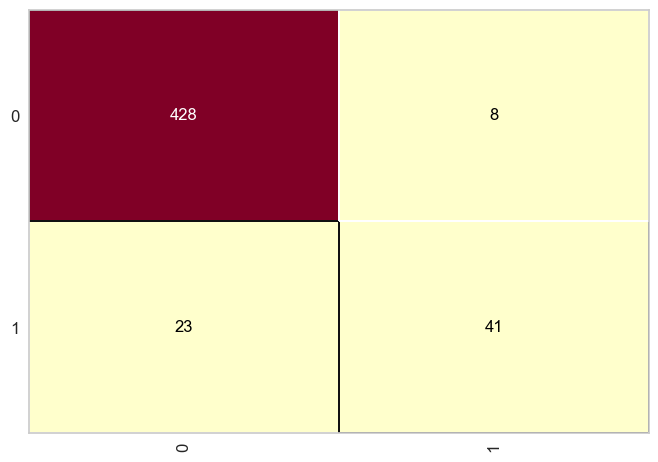

In [78]:
#             Pagam    Não Pagam
#     Pagam [[  X          X
# Não Pagam     X          X]]
display(confusion_matrix(y_true=y_credit_teste, y_pred=previsoes))

from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

Relatório de Classificação

In [82]:
print(classification_report(y_credit_teste,previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



### Base do Censo

In [88]:
with open('/Users/gustavomeira/Documents/Python/Estudo_ML/projects/Classificação/census.pkl',mode='rb') as f:
    [X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste] = pickle.load(f)

X_census_treinamento = np.array(X_census_treinamento)
y_census_treinamento = np.array(y_census_treinamento)
X_census_teste = np.array(X_census_teste)
y_census_teste = np.array(y_census_teste)

In [87]:
X_census_treinamento.shape

(27676, 108)

In [91]:
naive_census = GaussianNB()
naive_census.fit(X=X_census_treinamento, y=y_census_treinamento)
previsoes = naive_census.predict(X=X_census_teste)
print(previsoes)

[' >50K' ' >50K' ' >50K' ... ' <=50K' ' >50K' ' >50K']


In [92]:
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

Acurácia muito baixa, não devemos ir para deploy

In [94]:
print(confusion_matrix(y_true=y_census_teste,y_pred=previsoes))
print(classification_report(y_true=y_census_teste,y_pred=previsoes))

[[1172 2521]
 [  35 1157]]
              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



Vemos que o desempenho é bom para >50k (linha inferior da matriz)